<a href="https://colab.research.google.com/github/grandhigowthamramsai/rugved1/blob/main/linear_schosticgradientdescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded=files.upload()

Saving co2.csv to co2 (1).csv


In [ ]:
df=pd.read_csv('co2.csv')

In [ ]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df=df.drop(['Make','Model','Vehicle Class','Transmission','Fuel Type'],axis=1)

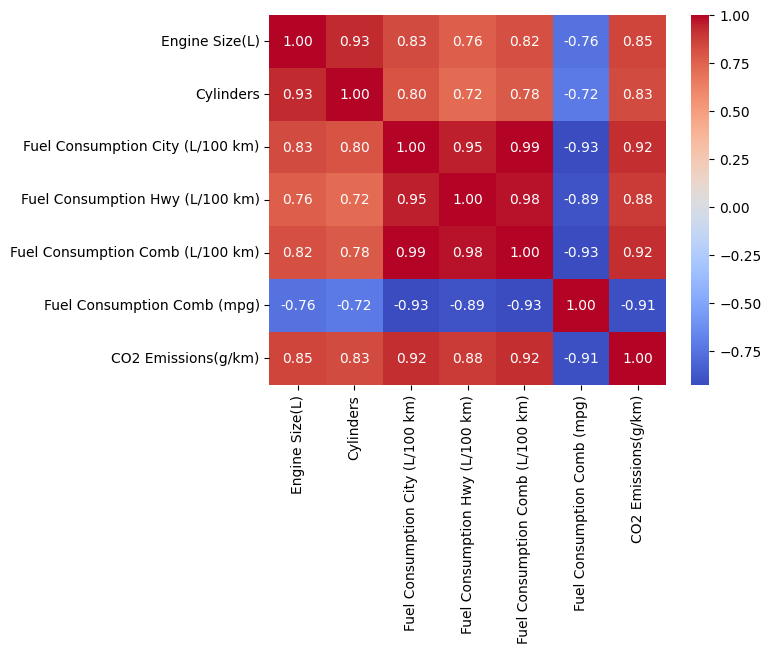

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt='.2f')
plt.show()

In [ ]:
df=df.drop(['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (mpg)'],axis=1)

In [ ]:
df.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [ ]:
df.isnull().sum()

,0
Engine Size(L),0
Cylinders,0
Fuel Consumption Comb (L/100 km),0
CO2 Emissions(g/km),0


In [ ]:

Train,Valid,Test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def mean(Train,x):
  y=Train[x].mean()

  y1=Train[x].std()
  for index, row in Train.iterrows():
    Train.at[index, x] = (row[x]-y)/y1


  return Train[x]

In [ ]:
Train['Engine Size(L)']=mean(Train,'Engine Size(L)')
Train['Cylinders']=mean(Train,'Cylinders')
Train['Fuel Consumption Comb (L/100 km)']=mean(Train,'Fuel Consumption Comb (L/100 km)')

Test['Engine Size(L)']=mean(Test,'Engine Size(L)')
Test['Cylinders']=mean(Test,'Cylinders')
Test['Fuel Consumption Comb (L/100 km)']=mean(Test,'Fuel Consumption Comb (L/100 km)')

/tmp/ipython-input-27-1592438248.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.9035724112431778' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Train.at[index, x] = (row[x]-y)/y1
/tmp/ipython-input-27-1592438248.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.8560228113702468' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Train.at[index, x] = (row[x]-y)/y1


In [ ]:
Train

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
5908,-1.023583,-0.903572,-1.108499,181
4276,0.608237,0.200143,0.789292,310
508,0.089022,0.200143,0.064681,258
6717,1.572495,1.303859,1.410387,354
6375,0.608237,1.303859,0.306218,279
...,...,...,...,...
1616,-1.171930,-0.903572,-1.143004,177
5772,-0.356020,0.200143,0.271713,277
489,-1.023583,-0.903572,-1.315530,166
3958,2.462578,3.511291,2.376535,428


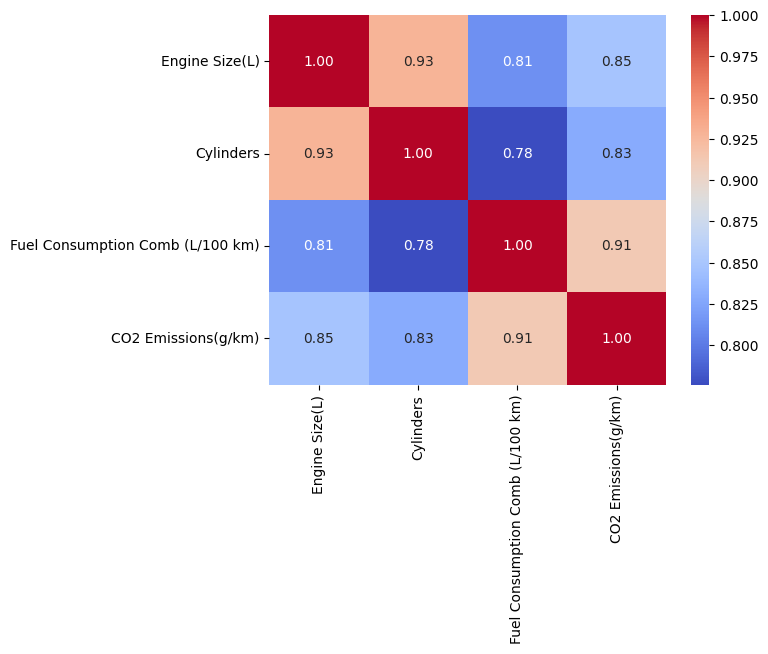

In [ ]:
sns.heatmap(Train.corr(),annot=True,cmap="coolwarm",fmt='.2f')
plt.show()

In [ ]:
def seperate(df):
  x=df.iloc[:, :-1]
  y=df.iloc[:,-1]

  return x,y
train_x,train_y=seperate(Train)
valid_x,valid_y=seperate(Valid)
test_x,test_y=seperate(Test)


In [ ]:
class linear_regression():
  def __init__(self,X,Y):
    self.X=X
    self.Y=Y
    self.theta=np.zeros((4,4431))
    self.sum_cols=0
    self.weights=None
    self.bias=None
  def weigh(self):
    self.weights_1D=np.zeros(4,)
    self.weights_2D = np.expand_dims(self.weights_1D, axis=1)

    bias=self.weights_2D[0]
  def val(self):

    arr_X = self.X.to_numpy()
    arr_Y=self.Y.to_numpy()
    arr_Y = np.expand_dims(arr_Y, axis=1)

    X0_ARR=np.ones(self.X.shape[0],)
    X0_ARR_2D= np.expand_dims(X0_ARR, axis=1)
    arr_X=np.hstack((X0_ARR_2D,arr_X))


    epoch=0
    while(epoch<10):
      iteration=0
      while(iteration<len(arr_X)):
        for index in range(len(self.weights_2D)):

          FEATURE_2D= np.expand_dims(arr_X[iteration], axis=1)
          FEATURE_2D=np.transpose(FEATURE_2D)
          DOT_PROD=np.dot(FEATURE_2D,self.weights_2D)
          self.weights_2D[index][0]-=0.005*((DOT_PROD[0][0]-arr_Y[iteration][0])*FEATURE_2D[0][index])
          self.theta[index][iteration]=((DOT_PROD[0][0]-arr_Y[iteration][0])*FEATURE_2D[0][index])
        iteration+=1

        if(iteration%100==0):

          print('iteration ',iteration )
          print('BIAS  : ',self.weights_2D[0][0],'WEIGHTS 1  :  ',self.weights_2D[1][0],'WEIGHTS 2  :  ',self.weights_2D[2][0],'WEIGHTS 3  :  ',self.weights_2D[3][0])
      self.sum_cols = np.sum(self.theta, axis=1)
      self.sum_cols=-0.1*self.sum_cols/4431
      self.sum_cols=self.sum_cols.reshape(4,1)

      print(self.sum_cols)
      print(self.weights_2D)
      epoch+=1
  def test(self,X,Y):
    self.X=X
    self.Y=Y
    arr_X = self.X.to_numpy()
    arr_Y=self.Y.to_numpy()
    arr_Y = np.expand_dims(arr_Y, axis=1)
    X0_ARR=np.ones(self.X.shape[0],)
    X0_ARR_2D= np.expand_dims(X0_ARR, axis=1)
    arr_X=np.hstack((X0_ARR_2D,arr_X))
    iteration=0
    sum=0
    sum1=0
    self.pre=np.empty([arr_X.shape[0], 1])
    while(iteration<arr_X.shape[0]):
      c=arr_Y.mean()

      FEATURE_2D= np.expand_dims(arr_X[iteration], axis=1)
      FEATURE_2D=np.transpose(FEATURE_2D)
      DOT_PROD=np.dot(FEATURE_2D,self.weights_2D)
      self.pre[iteration][0]= DOT_PROD[0][0]
      sum+=(DOT_PROD[0][0]-arr_Y[iteration][0])**2
      sum1+=(arr_Y[iteration][0]-c)**2
      iteration+=1
    print(c)
    print(1-sum/sum1)
  def plot(self,Y):
    arr_Y=self.Y.to_numpy()
    arr_Y = np.expand_dims(arr_Y, axis=1)
    print(arr_Y.shape,self.pre.shape )
    plt.scatter(arr_Y[:,0],self.pre[:,0] , color='red', label='Actual Values')
    plt.plot(arr_Y,arr_Y, color='blue', label='Predicted Line')
    plt.show()



In [ ]:

MODEL=linear_regression(train_x,train_y)


MODEL.weigh()

MODEL.val()



iteration  100
BIAS  :  97.4704589323868 WEIGHTS 1  :   11.778767650601011 WEIGHTS 2  :   8.478718635168464 WEIGHTS 3  :   6.596413899452872
iteration  200
BIAS  :  157.87522449252742 WEIGHTS 1  :   11.194610361329591 WEIGHTS 2  :   7.983983231883286 WEIGHTS 3  :   13.599945051712073
iteration  300
BIAS  :  194.23198566336305 WEIGHTS 1  :   16.361152718637026 WEIGHTS 2  :   12.301737346456479 WEIGHTS 3  :   22.108135323657507
iteration  400
BIAS  :  217.0154316816256 WEIGHTS 1  :   16.717253652767457 WEIGHTS 2  :   11.78733340850122 WEIGHTS 3  :   25.51344892700399
iteration  500
BIAS  :  229.5012872423912 WEIGHTS 1  :   17.316925797568153 WEIGHTS 2  :   11.920224216159946 WEIGHTS 3  :   27.11633351878267
iteration  600
BIAS  :  236.59018027132436 WEIGHTS 1  :   15.475259655632186 WEIGHTS 2  :   9.465528798076619 WEIGHTS 3  :   26.499604346513937
iteration  700
BIAS  :  242.29209674269845 WEIGHTS 1  :   16.587815184189846 WEIGHTS 2  :   10.9255775796285 WEIGHTS 3  :   28.55272755664218

In [ ]:



MODEL.test(test_x,test_y)

249.88828706838186
0.8846281982516626


(1477, 1) (1477, 1)


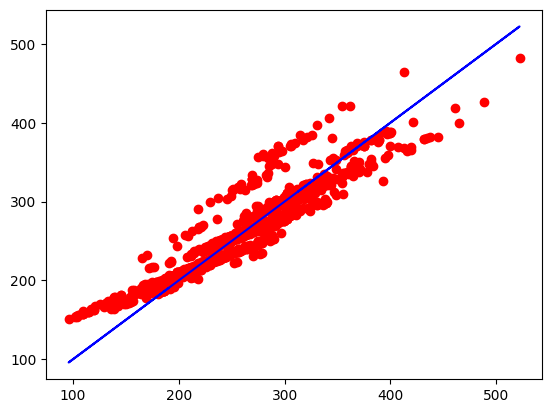

In [ ]:
MODEL.plot(test_y)

In [ ]:
class blinear_regression():
  def __init__(self,X,Y):
    self.X=X
    self.Y=Y
    self.theta=np.zeros((4,4431))
    self.sum_cols=0
    self.weights=None
    self.bias=None
  def weigh(self):
    self.weights_1D=np.zeros(4,)
    self.weights_2D = np.expand_dims(self.weights_1D, axis=1)

    bias=self.weights_2D[0]
  def val(self):

    arr_X = self.X.to_numpy()
    arr_Y=self.Y.to_numpy()
    arr_Y = np.expand_dims(arr_Y, axis=1)

    X0_ARR=np.ones(self.X.shape[0],)
    X0_ARR_2D= np.expand_dims(X0_ARR, axis=1)
    arr_X=np.hstack((X0_ARR_2D,arr_X))

    epoch=1000
    for i in range(epoch):
        y_pred = np.dot(arr_X, self.weights_2D)
        error = y_pred - arr_Y
        gradient = (1/arr_X.shape[0]) * np.dot(arr_X.T, error)
        self.weights_2D -= 0.1 * gradient

        if(i%100==0):
          print('BIAS  : ',self.weights_2D[0][0],'WEIGHTS 1  :  ',self.weights_2D[1][0],'WEIGHTS 2  :  ',self.weights_2D[2][0],'WEIGHTS 3  :  ',self.weights_2D[3][0])

    print(self.weights_2D)
  def test(self,X,Y):
    self.X=X
    self.Y=Y
    arr_X = self.X.to_numpy()
    arr_Y=self.Y.to_numpy()
    arr_Y = np.expand_dims(arr_Y, axis=1)
    X0_ARR=np.ones(self.X.shape[0],)
    X0_ARR_2D= np.expand_dims(X0_ARR, axis=1)
    arr_X=np.hstack((X0_ARR_2D,arr_X))
    iteration=0
    sum=0
    sum1=0
    self.pre=np.empty([arr_X.shape[0], 1])
    while(iteration<arr_X.shape[0]):
      c=arr_Y.mean()

      FEATURE_2D= np.expand_dims(arr_X[iteration], axis=1)
      FEATURE_2D=np.transpose(FEATURE_2D)
      DOT_PROD=np.dot(FEATURE_2D,self.weights_2D)
      self.pre[iteration][0]= DOT_PROD[0][0]
      sum+=(DOT_PROD[0][0]-arr_Y[iteration][0])**2
      sum1+=(arr_Y[iteration][0]-c)**2
      iteration+=1
    print(c)
    print(1-sum/sum1)
  def plot(self,Y):
    arr_Y=self.Y.to_numpy()
    arr_Y = np.expand_dims(arr_Y, axis=1)
    print(arr_Y.shape,self.pre.shape )
    plt.scatter(arr_Y[:,0],self.pre[:,0] , color='red', label='Actual Values')
    plt.plot(arr_Y,arr_Y, color='blue', label='Predicted Line')
    plt.show()





In [ ]:

MODELb=blinear_regression(train_x,train_y)


MODELb.weigh()

MODELb.val()

BIAS  :  25.106048296095693 WEIGHTS 1  :   4.886999398996974 WEIGHTS 2  :   4.77436448235786 WEIGHTS 3  :   5.25190089661773
BIAS  :  251.05448129508733 WEIGHTS 1  :   10.697985542708555 WEIGHTS 2  :   10.543298895120492 WEIGHTS 3  :   35.280725355308945
BIAS  :  251.06048280154425 WEIGHTS 1  :   9.273509805043986 WEIGHTS 2  :   10.613357851046269 WEIGHTS 3  :   36.72260788645666
BIAS  :  251.06048296095264 WEIGHTS 1  :   8.770204373832806 WEIGHTS 2  :   10.96436486913928 WEIGHTS 3  :   36.889541795110006
BIAS  :  251.06048296095676 WEIGHTS 1  :   8.5363041783703 WEIGHTS 2  :   11.163563748986608 WEIGHTS 3  :   36.92924571928118
BIAS  :  251.06048296095676 WEIGHTS 1  :   8.421404256911682 WEIGHTS 2  :   11.264450092131902 WEIGHTS 3  :   36.94556551791768
BIAS  :  251.06048296095676 WEIGHTS 1  :   8.36444018634253 WEIGHTS 2  :   11.314707853494173 WEIGHTS 3  :   36.953403156413
BIAS  :  251.06048296095676 WEIGHTS 1  :   8.336157586205292 WEIGHTS 2  :   11.339679787794976 WEIGHTS 3  :   

In [ ]:

MODELb.test(test_x,test_y)

249.88828706838186
0.8901600709358265


(1477, 1) (1477, 1)


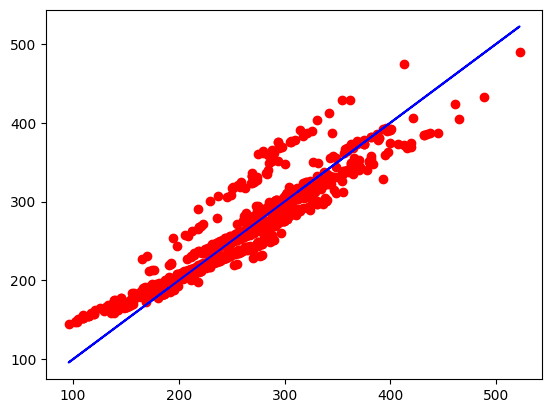

In [ ]:

MODELb.plot(test_y)

In [ ]:
class mblinear_regression():
  def __init__(self,X,Y):
    self.X=X
    self.Y=Y
    self.theta=np.zeros((4,4431))
    self.sum_cols=0
    self.weights=None
    self.bias=None

  def weigh(self):
    self.weights_1D=np.zeros(4,)
    self.weights_2D = np.expand_dims(self.weights_1D, axis=1)

    bias=self.weights_2D[0]
  def val(self):

    arr_X = self.X.to_numpy()
    arr_Y=self.Y.to_numpy()
    arr_Y = np.expand_dims(arr_Y, axis=1)

    X0_ARR=np.ones(self.X.shape[0],)
    X0_ARR_2D= np.expand_dims(X0_ARR, axis=1)
    arr_X=np.hstack((X0_ARR_2D,arr_X))

    epoch=1000
    batch=500
    for index in range(epoch):
      combined = np.hstack((arr_X, arr_Y))
      np.random.shuffle(combined)
      arr_X = combined[:, :-1]
      arr_Y = combined[:, -1:]
      for i in range(7):
        y_pred = np.dot(arr_X[i:batch*(i+1)], self.weights_2D)
        error = y_pred - arr_Y[i:batch*(i+1)]
        gradient = (1/batch) * np.dot(arr_X[i:batch*(i+1)].T, error)
        self.weights_2D -= 0.1 * gradient

      if(index%100==0):
        print('BIAS  : ',self.weights_2D[0][0],'WEIGHTS 1  :  ',self.weights_2D[1][0],'WEIGHTS 2  :  ',self.weights_2D[2][0],'WEIGHTS 3  :  ',self.weights_2D[3][0])

    print(self.weights_2D)
  def test(self,X,Y):
    self.X=X
    self.Y=Y
    arr_X = self.X.to_numpy()
    arr_Y=self.Y.to_numpy()
    arr_Y = np.expand_dims(arr_Y, axis=1)
    X0_ARR=np.ones(self.X.shape[0],)
    X0_ARR_2D= np.expand_dims(X0_ARR, axis=1)
    arr_X=np.hstack((X0_ARR_2D,arr_X))
    iteration=0
    sum=0
    sum1=0
    self.pre=np.empty([arr_X.shape[0], 1])

    while(iteration<arr_X.shape[0]):
      c=arr_Y.mean()

      FEATURE_2D= np.expand_dims(arr_X[iteration], axis=1)
      FEATURE_2D=np.transpose(FEATURE_2D)
      DOT_PROD=np.dot(FEATURE_2D,self.weights_2D)
      self.pre[iteration][0]= DOT_PROD[0][0]
      sum+=(DOT_PROD[0][0]-arr_Y[iteration][0])**2
      sum1+=(arr_Y[iteration][0]-c)**2
      iteration+=1
    print(c)
    print(1-sum/sum1)
  def plot(self,Y):
    arr_Y=self.Y.to_numpy()
    arr_Y = np.expand_dims(arr_Y, axis=1)
    print(arr_Y.shape,self.pre.shape )
    plt.scatter(arr_Y[:,0],self.pre[:,0] , color='red', label='Actual Values')
    plt.plot(arr_Y,arr_Y, color='blue', label='Predicted Line')
    plt.show()





In [ ]:
MODELmb=mblinear_regression(train_x,train_y)


MODELmb.weigh()

MODELmb.val()




BIAS  :  246.49488400245372 WEIGHTS 1  :   13.02534571771295 WEIGHTS 2  :   14.309006592566194 WEIGHTS 3  :   28.888249124084783
BIAS  :  250.9307311688145 WEIGHTS 1  :   8.193973497140286 WEIGHTS 2  :   12.024485494216622 WEIGHTS 3  :   36.23996567662026
BIAS  :  251.14377019295944 WEIGHTS 1  :   8.318439355280923 WEIGHTS 2  :   11.810225386917983 WEIGHTS 3  :   36.59606746484184
BIAS  :  250.95850806160988 WEIGHTS 1  :   8.29470527405176 WEIGHTS 2  :   11.371780189450591 WEIGHTS 3  :   36.96359989949474
BIAS  :  250.89789685132453 WEIGHTS 1  :   8.215937553946638 WEIGHTS 2  :   11.136186370084337 WEIGHTS 3  :   37.17715062240678
BIAS  :  250.85947569350213 WEIGHTS 1  :   8.35537527071773 WEIGHTS 2  :   11.645034828793696 WEIGHTS 3  :   36.89354525130246
BIAS  :  251.1976193422233 WEIGHTS 1  :   7.968180415265979 WEIGHTS 2  :   11.45582288009952 WEIGHTS 3  :   37.349648224149625
BIAS  :  251.11136135483318 WEIGHTS 1  :   8.324836853201726 WEIGHTS 2  :   11.720736976773402 WEIGHTS 3  :

In [ ]:

MODELmb.test(test_x,test_y)

249.88828706838186
0.8896231114530829


(1477, 1) (1477, 1)


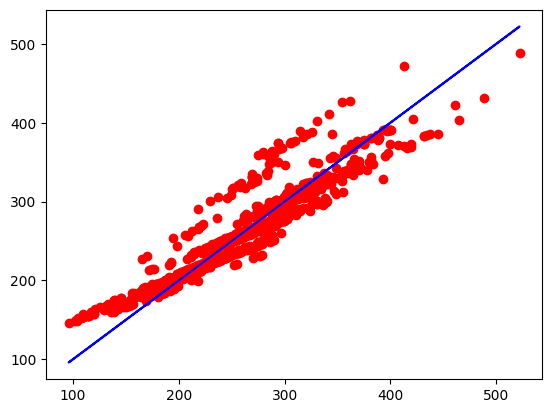

In [ ]:
MODELmb.plot(test_y)

In [ ]:

class normal_equation():
  def __init__(self,X,Y):
    self.X=X
    self.Y=Y
  def weigh(self):
    self.weights_1D=np.zeros(4,)
    self.weights_2D = np.expand_dims(self.weights_1D, axis=1)
  def val(self):
    arr_X = self.X.to_numpy()
    arr_Y=self.Y.to_numpy()
    arr_Y = np.expand_dims(arr_Y, axis=1)
    X0_ARR=np.ones(self.X.shape[0],)
    X0_ARR_2D= np.expand_dims(X0_ARR, axis=1)
    arr_X=np.hstack((X0_ARR_2D,arr_X))
    self.weights_2D=np.dot(np.dot(np.linalg.inv(np.dot(arr_X.T,arr_X)),arr_X.T),arr_Y)
    print(self.weights_2D)
  def test(self,X,Y):
    self.X=X
    self.Y=Y
    arr_X = self.X.to_numpy()
    arr_Y=self.Y.to_numpy()
    arr_Y = np.expand_dims(arr_Y, axis=1)
    X0_ARR=np.ones(self.X.shape[0],)
    X0_ARR_2D= np.expand_dims(X0_ARR, axis=1)
    arr_X=np.hstack((X0_ARR_2D,arr_X))
    iteration=0
    sum=0
    sum1=0
    self.pre=np.empty([arr_X.shape[0], 1])
    while(iteration<arr_X.shape[0]):
      c=arr_Y.mean()

      FEATURE_2D= np.expand_dims(arr_X[iteration], axis=1)
      FEATURE_2D=np.transpose(FEATURE_2D)
      DOT_PROD=np.dot(FEATURE_2D,self.weights_2D)
      self.pre[iteration][0]= DOT_PROD[0][0]
      sum+=(DOT_PROD[0][0]-arr_Y[iteration][0])**2
      sum1+=(arr_Y[iteration][0]-c)**2
      iteration+=1
    print(c)
    print(1-sum/sum1)
  def plot(self,Y):
    arr_Y=self.Y.to_numpy()
    arr_Y = np.expand_dims(arr_Y, axis=1)
    print(arr_Y.shape,self.pre.shape )
    plt.scatter(arr_Y[:,0],self.pre[:,0] , color='red', label='Actual Values')
    plt.plot(arr_Y,arr_Y, color='blue', label='Predicted Line')
    plt.show()






In [ ]:
MODELeq=normal_equation(train_x,train_y)


MODELeq.weigh()

MODELeq.val()


[[251.06048296]
 [  8.30825432]
 [ 11.36432002]
 [ 36.96109069]]


In [ ]:

MODELeq.test(test_x,test_y)

249.88828706838186
0.890160266972165


(1477, 1) (1477, 1)


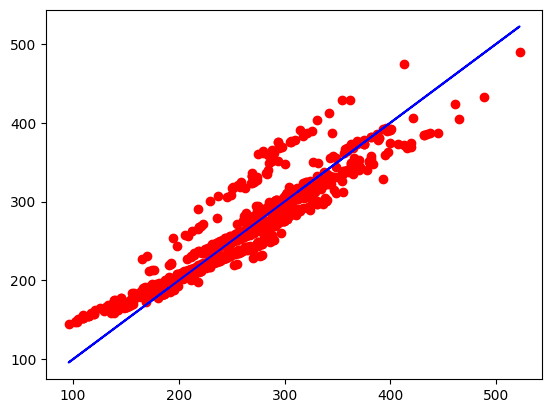

In [ ]:
MODELeq.plot(test_y)